In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [2]:
df3 = pd.read_csv("data/raw/rdd_data.csv")

In [3]:
print(df3)

      spend_1m_baby  spend_2m_baby  spend_3m_baby  spend_4m_baby  \
0                 5              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
9995              0              0              0              0   
9996             10              0              5             25   
9997              0              0              0              0   
9998              0              0              0              0   
9999              0              0              0              0   

      spend_5m_baby  spend_6m_baby  spend_1m_clothes  spend_2m_clothes  \
0                10            0.0                 0               0.0   
1                 0            0.0 

In [4]:
# df3.describe()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spend_1m_baby       10000 non-null  int64  
 1   spend_2m_baby       10000 non-null  int64  
 2   spend_3m_baby       10000 non-null  int64  
 3   spend_4m_baby       10000 non-null  int64  
 4   spend_5m_baby       10000 non-null  int64  
 5   spend_6m_baby       10000 non-null  float64
 6   spend_1m_clothes    10000 non-null  int64  
 7   spend_2m_clothes    10000 non-null  float64
 8   spend_3m_clothes    10000 non-null  float64
 9   spend_4m_clothes    10000 non-null  float64
 10  spend_5m_clothes    10000 non-null  float64
 11  spend_6m_clothes    10000 non-null  float64
 12  spend_1m_health     10000 non-null  int64  
 13  spend_2m_health     10000 non-null  int64  
 14  spend_3m_health     10000 non-null  int64  
 15  spend_4m_health     10000 non-null  int64  
 16  spend

In [5]:
df3.discount

0         $ 4.0
1         $ 2.0
2       $ 224.0
3         $ 1.0
4        $ 13.0
         ...   
9995    $ 252.0
9996    $ 257.0
9997     $ 35.0
9998    $ 136.0
9999     $ 74.0
Name: discount, Length: 10000, dtype: object

In [6]:
# defining a function that replaces $ for nothing in order to get rid of the non-numerical values
def remove_symbols_2(discount):
  return float(discount.replace('$ ', '')) 

In [7]:
remove_symbols_2("$ 110.0")

110.0

In [8]:
df3.discount = df3.discount.apply(remove_symbols_2)

In [9]:
# reminder to check if I need to delete any symbols (cleaning data) 
df4 = df3[['sales','discount','profit','age','gender','cust_state','tenure']]
df4.head()

,sales,discount,profit,age,gender,cust_state,tenure
0,1442.30,4.0,66.93,30,0.0,MA,19
1,883.96,2.0,41.33,30,1.0,MG,20
2,4900.67,224.0,15.88,29,0.0,RJ,21
3,1547.48,1.0,74.99,36,1.0,BA,18
4,1335.23,13.0,52.41,37,0.0,PB,19


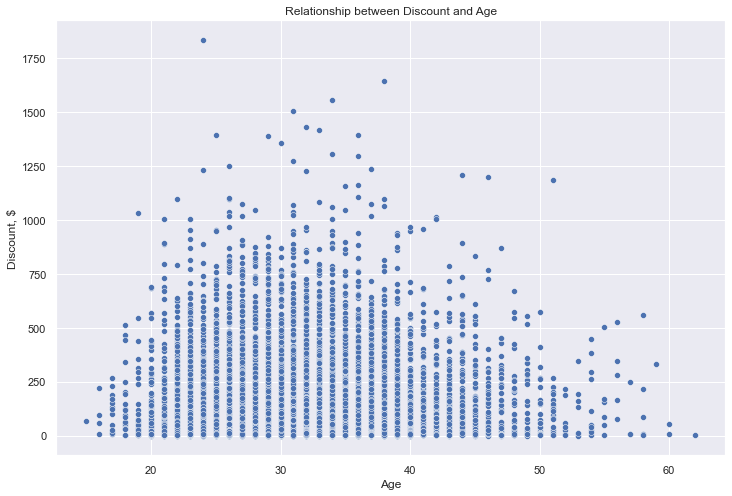

In [10]:
# Identify a running variable in which the discount treatment is discontinuous. No discontinuity observed.
plt.figure(figsize=(12,8))
sns.scatterplot(x="age", y="discount", data=df3)
plt.ylabel('Discount, $')
plt.xlabel('Age')
plt.title('Relationship between Discount and Age')
plt.show()

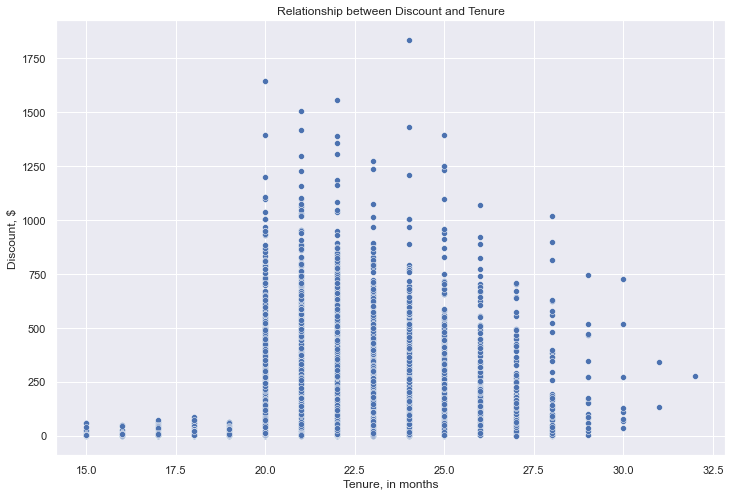

In [11]:
# Identify a running variable in which the discount treatment is discontinuous. Huge discontinuity observed.
# This is a running variable in which the discount treatment is discontinuous.
plt.figure(figsize=(12,8))
sns.scatterplot(x="tenure", y="discount", data=df3)
plt.ylabel('Discount, $')
plt.xlabel('Tenure, in months')
plt.title('Relationship between Discount and Tenure')
plt.show()

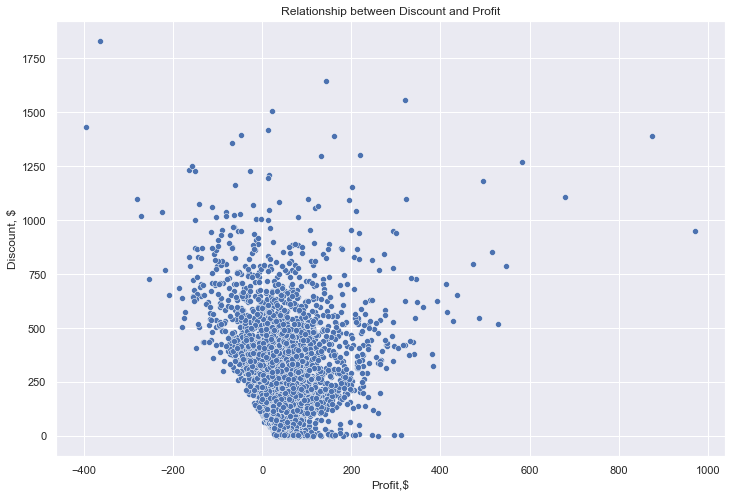

In [12]:
# Identify a running variable in which the discount treatment is discontinuous. No discontinuity observed.
plt.figure(figsize=(12,8))
sns.scatterplot(x="profit", y="discount", data=df3)
plt.ylabel('Discount, $')
plt.xlabel('Profit,$')
plt.title('Relationship between Discount and Profit')
plt.show()

In [13]:
sales_mean = df3['sales'].mean()
print(sales_mean)
aggregate_tenure = df3['tenure'].sum()
print(aggregate_tenure)
profits_mean = df3['profit'].mean()
print(profits_mean)

3920.136075
209859
47.64593


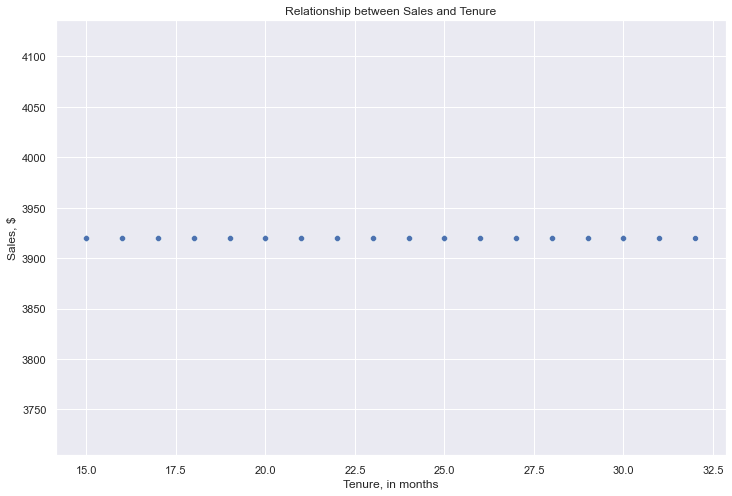

In [14]:
# Aggregate your dataframe by tenure and aggregate sales with the mean???
# The discountinuity in discounts translates to a discontinuity in sales
plt.figure(figsize=(12,8))
sns.scatterplot(x='tenure', y=sales_mean, data=df3)
plt.ylabel('Sales, $')
plt.xlabel('Tenure, in months')
plt.title('Relationship between Sales and Tenure')
plt.show() 

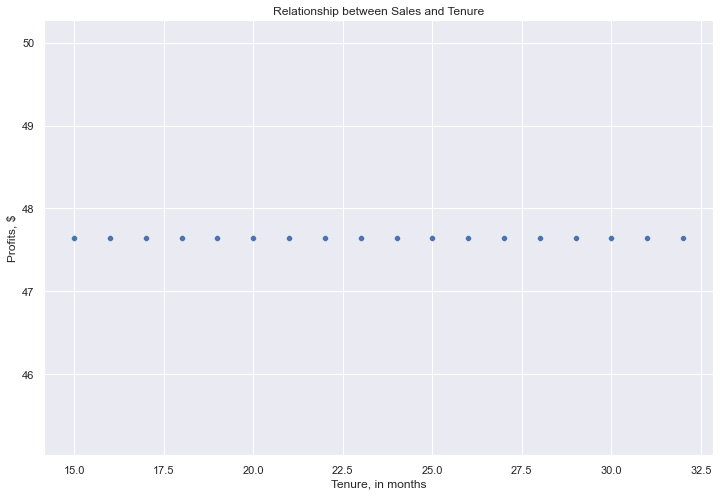

In [15]:
# Aggregate your dataframe by tenure and aggregate profits with the mean???
# The discontinuity in discounts does not translate to a discontinuity in sales
plt.figure(figsize=(12,8))
sns.scatterplot(x="tenure", y=profits_mean, data=df3)
plt.ylabel('Profits, $')
plt.xlabel('Tenure, in months')
plt.title('Relationship between Sales and Tenure')
plt.show() 

In [16]:
# Grouping by tenure in order to get number of customers
number_customers = df3.groupby('tenure')['tenure'].sum()
df3['number_customers'] = pd.Series([15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])

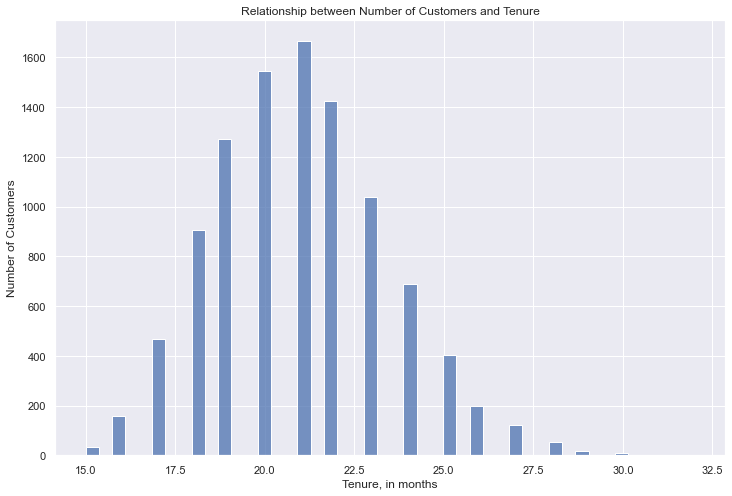

In [17]:
# With the aggregated data, plot the tenure on the x-axis and the number of customers on the y-axis. Esta a escala?
# I do not see any evidence of bunching
plt.figure(figsize=(12,8))
sns.histplot(data=df3, x="tenure")
plt.ylabel('Number of Customers')
plt.xlabel('Tenure, in months')
plt.title('Relationship between Number of Customers and Tenure')
plt.show() 

In [18]:
# Create a new dataframe rdd_centered with the feature engineering required for RDD
# rdd_centered: using df3 as rdd_centered until I figure out how to duplicate and modify dataframe
centered_tenure = df3['tenure']-19
if df3['tenure'].all() > 19:
    above_threshold = 1
else:
    above_threshold = 0
df3['above_threshold']=above_threshold
print(df3)


      spend_1m_baby  spend_2m_baby  spend_3m_baby  spend_4m_baby  \
0                 5              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
9995              0              0              0              0   
9996             10              0              5             25   
9997              0              0              0              0   
9998              0              0              0              0   
9999              0              0              0              0   

      spend_5m_baby  spend_6m_baby  spend_1m_clothes  spend_2m_clothes  \
0                10            0.0                 0               0.0   
1                 0            0.0 